# This reads most recent iTunes reviews for the Zelle Purple app 

    - Reading customer reviews from the iTunes Store API
    - using pandas python for data mining
    - and outputs two word-cloud images

Created on 2019 Mar 1 by Edwin Campos

Last modification 2019 Mar 1 by ecampos.phd@gmail.com

In [1]:
# Dependencies
import pandas as pd
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [2]:
# Global variables
URL = 'http://itunes.apple.com/rss/customerreviews/id=1260755201/page=10/sortby=mostrecent/json'
#URL = 'http://itunes.apple.com/rss/customerreviews/id=1260755201/sortby=mostrecent/json'

In [3]:
# Ingest inputs
#response = requests.get(url)
df = pd.read_json(URL)#, orient='columns')
print(df)

                                                      feed
author   {'name': {'label': 'iTunes Store'}, 'uri': {'l...
entry    [{'author': {'uri': {'label': 'https://itunes....
icon      {'label': 'http://itunes.apple.com/favicon.ico'}
id       {'label': 'http://itunes.apple.com/rss/custome...
link     [{'attributes': {'rel': 'alternate', 'type': '...
rights              {'label': 'Copyright 2008 Apple Inc.'}
title          {'label': 'iTunes Store: Customer Reviews'}
updated             {'label': '2019-03-01T10:04:16-07:00'}


In [4]:
# Time stamp is not available for particular reviews, but for 10-pages aggregates
time_stamp = df.feed.updated['label']
print(time_stamp)

2019-03-01T10:04:16-07:00


In [5]:
#print(df.feed.entry)
reviews_df = pd.DataFrame()
for review in df.feed.entry:
    version= review['im:version']['label']
    rating = review['im:rating']['label']
    title  = review['title']['label']
    content= review['content']['label']
    
    data_dict = {'version': version, 'rating': int(rating),
                 'title': title,'content': content
                }
    #print(data_dict)
    new_row_pd = pd.Series(data_dict)
    '''
    new_row_pd = pd.Series({'version': version, 
                               'rating': rating,
                               'title': title,
                               'content': content
                              })
    '''
    #print(new_row_pd)
  
    reviews_df = reviews_df.append(new_row_pd, ignore_index=True)


In [6]:
print(reviews_df)

                                              content  rating  \
0   For a Financial app this is absolutely horribl...     1.0   
1   The overall app is pretty clear and simple to ...     3.0   
2   I have to type phone numbers in manually to se...     1.0   
3   I’m scared that these are the engineers we tru...     1.0   
4                                        Horrible app     1.0   
5   This app is so difficult to use. Me and my fri...     1.0   
6   Don’t send large amounts: of it doesn’t go thr...     1.0   
7   My bank stated they are on Zelle. Each time I’...     2.0   
8   I got scammed and there’s no way to cancel pay...     1.0   
9               This app save a lot time is very good     5.0   
10  I WAS successfully using Zelle for two years. ...     1.0   
11             A mi esposo y a mi nos resulta genial.     5.0   
12                      Deserves one star that’s dumb     1.0   
13  Zelle is the easiest way and quicker way to se...     5.0   
14  I feel confident in s

In [7]:
# Separate Positive and Negative Reviews
positive_reviews_df = reviews_df[reviews_df['rating'] >= 4]
count_positive_reviews = len(positive_reviews_df)
negative_reviews_df = reviews_df[reviews_df['rating'] <= 2]
count_negative_reviews = negative_reviews_df.shape[0]
sentiment_summary_text = ' %i positive reviews and %i negative reviews.' %\
                          (count_positive_reviews, count_negative_reviews)
print(sentiment_summary_text )


 13 positive reviews and 34 negative reviews.


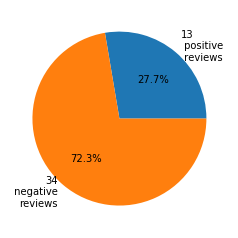

In [8]:
# Create a pie plot to see if the distribution is unbalanced
labels = str(count_positive_reviews)+'\n positive\n reviews', str(count_negative_reviews)+'\n negative\nreviews'
sizes = [count_positive_reviews, count_negative_reviews]
#plt.style.use('ggplot')
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

In [9]:
print(positive_reviews_df)

                                              content  rating  \
9               This app save a lot time is very good     5.0   
11             A mi esposo y a mi nos resulta genial.     5.0   
13  Zelle is the easiest way and quicker way to se...     5.0   
14  I feel confident in sending funds through this...     5.0   
16  No instant fee charge and it automatically sen...     5.0   
17  I don’t understand why other people are compla...     5.0   
26  Zelle is awesome! Love this easy, convenient t...     5.0   
30  I’m very pleased, this app has saved me from m...     5.0   
32                                               Smfh     5.0   
36  My family and I use this app to pay for shared...     5.0   
39  I like it with exception that I’m not able to ...     4.0   
42  Awesome app. Sends money right away to bank ac...     5.0   
48                                       Excelent app     5.0   

                                                title version  
9                        

In [10]:
# Tokenization: Split text into tokens, in this case into individual words.
# Extract positive words
positive_words_string = positive_reviews_df.content.str.cat(sep=' ')
# Extract negative words
negative_words_string = negative_reviews_df.content.str.cat(sep=' ')

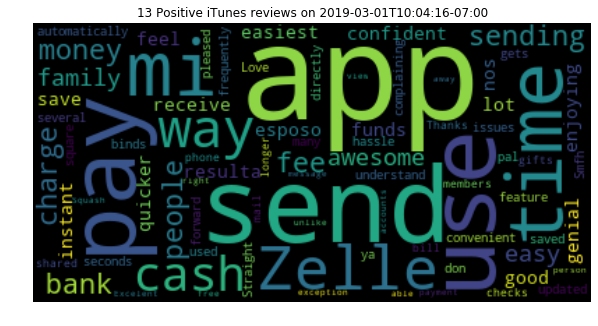

In [11]:
# Plot word-cloud image for Positive Reviews
positive_wordcloud = WordCloud().generate(positive_words_string)
negative_wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(negative_words_string)

plt.figure(figsize=(10,8))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('%i Positive iTunes reviews on %s' % (count_positive_reviews, time_stamp) )
plt.savefig('./AnalyzeSentimentPositive.png')
plt.show()
# Recall that plt.show() should be at the end of the code sniippet, because it erases the display object

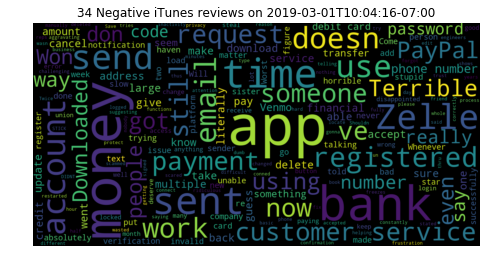

In [12]:
# Plot word-cloud image for Negative Reviews
negative_wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(negative_words_string)

plt.figure(figsize=(8,8))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('%i Negative iTunes reviews on %s' % (count_negative_reviews, time_stamp) )

plt.savefig('./AnalyzeSentimentNegative.png')
plt.show()  
# Recall that plt.show() should be at the end of the code sniippet, because it erases the display object

## Future Work
1. Compute Term-Frequency Inverse-Document-Frequency(TF IDF) metric

See for example section 2.2.2 in https://www.kaggle.com/divsinha/sentiment-analysis-countvectorizer-tf-idf

    from sklearn.feature_extraction.text import TfidfVectorizer

For this, vectorize the word counts: Use a CountVectorizer, which converts a collection of text documents to a matrix of the counts of occurences of each word in the document.

2. In another notebook (PredictSentiment), I will train a Logistic Regression model to predict sentiment.